<a href="https://colab.research.google.com/github/jeevan-nh/Google-collab-udemy-DL-course/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOM - SELF ORGANIZING MAP

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [0]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [0]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [0]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

##USING SOM

In [0]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10,input_len = 15,sigma=1.0,learning_rate=0.5) #initilizing the SOM

In [0]:
som.random_weights_init(X) #initilizing the random weights
som.train_random(data = X,num_iteration=100) #training the model

##Visulizing the SOM result

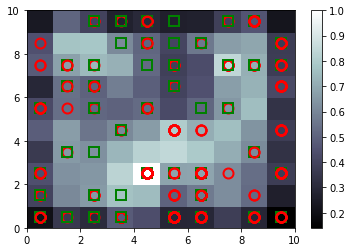

In [18]:
from pylab import bone,pcolor,colorbar,plot,show
bone() #creats the panel for our figure
pcolor(som.distance_map().T) #creats a heatmap of the som
colorbar() #creats a legend
markers = ['o','s']
colors = ['r','g']
for i,x  in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[Y[i]],
       markeredgecolor = colors[Y[i]],
       markerfacecolor = 'None',
       markersize = 8,
       markeredgewidth = 1)
show()

##Finding the Frauds


In [22]:
Mappings = som.win_map(X)
frauds = Mappings[(5,2)] #(5,2) from som result heat map
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5699340e+07, 1.0000000e+00, 2.3170000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5684440e+07, 1.0000000e+00, 3.3670000e+01, 2.1650000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.2000000e+02, 1.0000000e+00],
       [1.5778589e+07, 1.0000000e+00, 2.0420000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00]])